## Read Data

In [1]:
import pandas as pd 

def get_ops_leader(year):
    year_stats = ops_leader[ops_leader['Year'] == year]
    ops_leader_value = year_stats['OPS_Leader'].values[0]
    return ops_leader_value

def get_era_leader(year):
    year_stats = era_leader[era_leader['Year'] == year]
    era_leader_value = year_stats['ERA_Leader'].values[0]
    return era_leader_value


def get_average_ops(year):
    year_stats = average_batting[average_batting['Year'] == year]
    return year_stats['OPS'].values[0]

def get_average_era(year):
    year_stats = average_pitching[average_pitching['Year'] == year]
    return year_stats['ERA'].values[0]

contracts = pd.read_csv('contracts.csv', sep=',')
Batting_csv = pd.read_csv('kaggle/Batting.csv', sep=',')
Pitching_csv = pd.read_csv('kaggle/Pitching.csv', sep=',')
ops_leader = pd.read_csv('ops_leader.csv', sep=',')
era_leader = pd.read_csv('era_leader.csv', sep=',')
average_batting = pd.read_csv('average_batting.csv', sep=',')
average_pitching = pd.read_csv('average_pitching.csv', sep=',')


## Computing OPS

In [2]:
batting_data = Batting_csv
batting_data['OBP'] = (batting_data['H'] + batting_data['BB'] + batting_data['HBP']) / (batting_data['AB'] + batting_data['BB'] + batting_data['HBP'] + batting_data['SF'])
batting_data['SLG'] = (batting_data['H'] - batting_data['2B'] - batting_data['3B'] - batting_data['HR'] + 2*batting_data['2B'] + 3*batting_data['3B'] + 4*batting_data['HR']) / batting_data['AB']
batting_data['OPS'] = batting_data['OBP'] + batting_data['SLG']



,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,SLG,OPS
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.322034,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.394161,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.481203,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.466667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101327,zitoba01,2015,1,OAK,AL,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
101328,zobribe01,2015,1,OAK,AL,67,235.0,39.0,63.0,20.0,...,33.0,26.0,2.0,0.0,0.0,3.0,5.0,0.354244,0.446809,0.801052
101329,zobribe01,2015,2,KCA,AL,59,232.0,37.0,66.0,16.0,...,29.0,30.0,1.0,1.0,0.0,2.0,3.0,0.363636,0.452586,0.816223
101330,zuninmi01,2015,1,SEA,AL,112,350.0,28.0,61.0,11.0,...,21.0,132.0,0.0,5.0,8.0,2.0,6.0,0.230159,0.300000,0.530159


## Select Player

In [18]:
players = (contracts['player'])

#current_player = players[len(players)-1]
#current_player = players[0]
#current_player = 'Manny Ramirez'
#current_player = 'Ken Griffey Jr'
# current_player = 'Barry Bonds'
current_player = 'Alex Rodriguez'

first_year_of_contract= contracts.loc[contracts['player'] == current_player, 'year'].values[0]

last_year_of_contract = first_year_of_contract + contracts.loc[contracts['player'] == current_player, 'length'].values[0]

row = contracts[contracts['player'] == current_player]

position = ''
if(row['pos'].item() == 'p'):
    position = 'pitcher'

if(row['pos'].item() == 'h'):
    position = 'hitter'
    
player_id = contracts.loc[contracts['player'] == current_player, 'player_id'].values[0]

all_player_stats = batting_data[batting_data['playerID'] == player_id]
YEAR = all_player_stats['yearID'].values

OPS = all_player_stats['OPS'].values

pitching_data = Pitching_csv[Pitching_csv['playerID'] == player_id]

ERA = pitching_data['ERA'].values


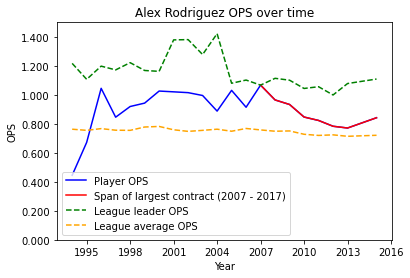

In [19]:

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, MaxNLocator

plt.xlabel('Year')

if(position == 'pitcher'):
    plt.ylabel('ERA')
    plt.title(current_player + ' ERA over time')

    # pitcher graph
    x = YEAR
    y = ERA

    # Create a line graph for all years
    plt.plot(x, y, color='blue')

    mask = (x >= first_year_of_contract) & (x <= last_year_of_contract)

    # Create a line graph for the years 2000 - 2005
    plt.plot(x[mask], y[mask], color='red')

    # Set y-axis to have fixed values
    plt.ylim(0, 5)  # Change these values as needed

    # Format y-axis to have three decimal places
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

        # Ensure x-axis has integer values
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))



    era_average_over_span = []
    for year in x:
        era_average_over_span.append(get_average_era(year))

    plt.plot(x, era_average_over_span, color='orange', linestyle='--')
    # Display the graph
    plt.show()
if(position == 'hitter'):
    plt.ylabel('OPS')
    plt.title(current_player + ' OPS over time')

    # hitter graph
    x = YEAR
    y = OPS

    # Create a line graph for all years
    plt.plot(x, y, color='blue')

    # Create a line graph for the years 2000 - 2005
    mask = (x >= first_year_of_contract) & (x <= last_year_of_contract)
    plt.plot(x[mask], y[mask], color='red')

    # # Add horizontal lines
    # plt.axhline(1.000, color='green', linestyle='--')

    # Set y-axis to have fixed values
    plt.ylim(0, 1.5)  # Change these values as needed

    # Format y-axis to have three decimal places
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

    # Ensure x-axis has integer values
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))


    ops_leader_over_span = []
    for year in x:
        ops_leader_over_span.append(get_ops_leader(year))

    plt.plot(x, ops_leader_over_span, color='green', linestyle='--')

    ops_average_over_span = []
    for year in x:
        ops_average_over_span.append(get_average_ops(year))
    plt.plot(x, ops_average_over_span, color='orange', linestyle='--')


    plt.legend(['Player OPS',
                'Span of largest contract' + ' (' + str(int(first_year_of_contract)) + ' - ' + str(int(last_year_of_contract)) + ')',
                'League leader OPS',
                'League average OPS',
                ], loc='lower left')
    
    # Display the graph
    plt.show()

## Data Preparation for Dashboard

In [55]:
contracts.head()

,player,player_id,amount,length,year,team,pos
0,Alex Rodriguez,rodrial01,"$275,000,000.00",10.0,2007.0,NYY,h
1,Derek Jeter,jeterde01,"$189,000,000.00",10.0,2001.0,NYY,h
2,Manny Ramirez,ramirma02,"$160,000,000.00",8.0,2000.0,BOS,h
3,Albert Pujols,pujolal01,"$240,000,000.00",10.0,2011.0,LAA,h
4,Clayton Kershaw,kershcl01,"$215,000,000.00",7.0,2014.0,LAD,p


In [44]:
contracts = contracts.dropna()
merged = pd.merge(batting_data, contracts, left_on='playerID', right_on='player_id')

merged.shape, batting_data.shape, contracts.shape

((634, 32), (101332, 25), (44, 7))

In [61]:
contracts.head()

,player,player_id,amount,length,year,team,pos
0,Alex Rodriguez,rodrial01,"$275,000,000.00",10.0,2007.0,NYY,h
1,Derek Jeter,jeterde01,"$189,000,000.00",10.0,2001.0,NYY,h
2,Manny Ramirez,ramirma02,"$160,000,000.00",8.0,2000.0,BOS,h
3,Albert Pujols,pujolal01,"$240,000,000.00",10.0,2011.0,LAA,h
4,Clayton Kershaw,kershcl01,"$215,000,000.00",7.0,2014.0,LAD,p


In [50]:
merged[['playerID', 'yearID', 'year']]

merged['out_of_contract'] = (merged['yearID'] < merged['year']) | (merged['yearID'] > merged['year'] + merged['length'])

In [63]:
merged[['player', 'player_id', 'yearID',  'OPS', 'pos', 'out_of_contract']].to_csv('player_visualization.csv')

In [70]:
avgs = pd.merge(average_pitching[['Year', 'ERA']], average_batting[['Year', 'OPS']], on='Year')
avgs.to_csv('docs/avgs.csv')

In [72]:
avgs

,Year,ERA,OPS
0,2023,4.28,0.734
1,2022,3.88,0.706
2,2021,4.32,0.728
3,2020,4.42,0.740
4,2019,4.60,0.758
...,...,...,...
118,1905,2.65,0.630
119,1904,2.60,0.622
120,1903,2.96,0.664
121,1902,3.57,0.665
